<a href="https://colab.research.google.com/github/Deyonrose/ADA/blob/main/2348513_ADA_Filteres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow




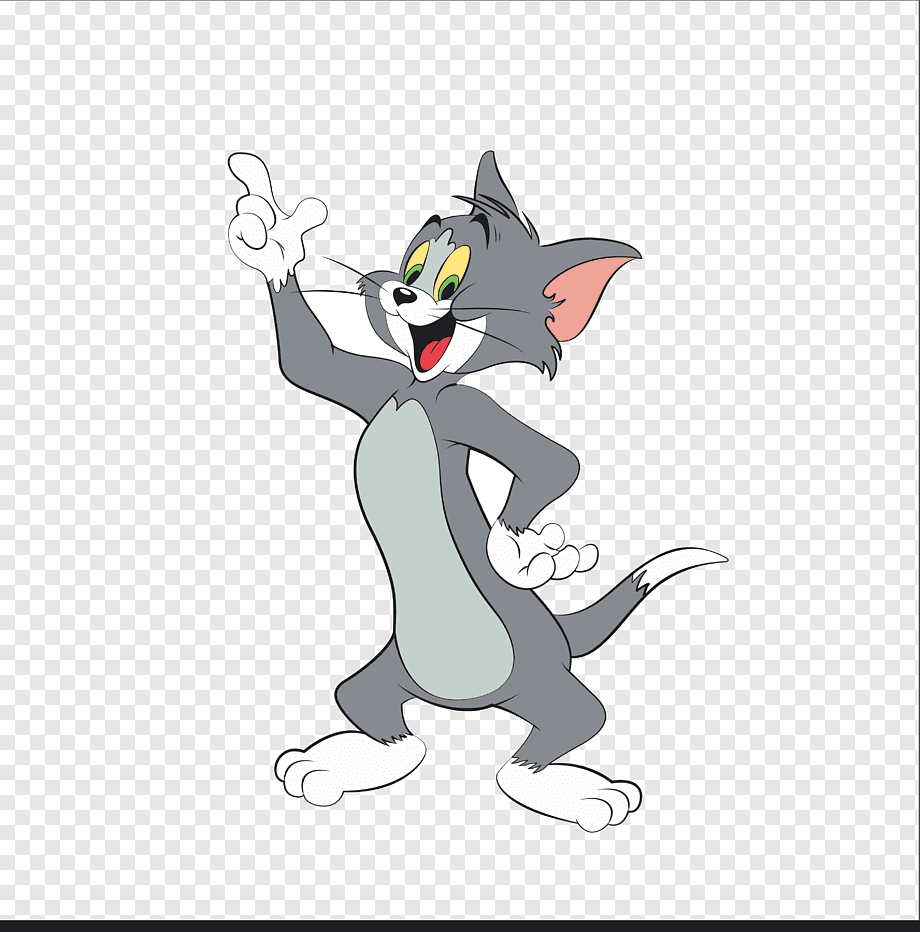

In [28]:
#loading the image
img = cv2.imread('/content/tom.png')
cv2_imshow(img)

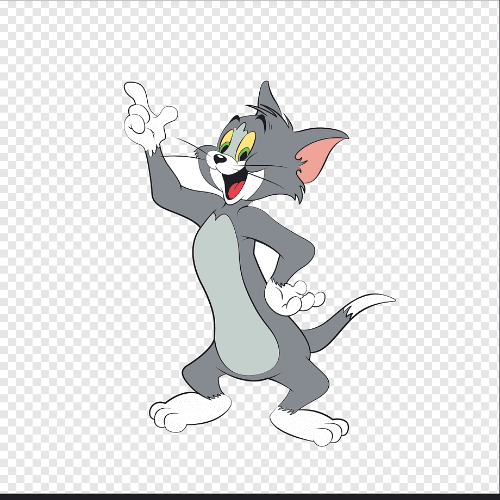

In [29]:
img_resize = cv2.resize(img, (500,500))
cv2_imshow(img_resize)

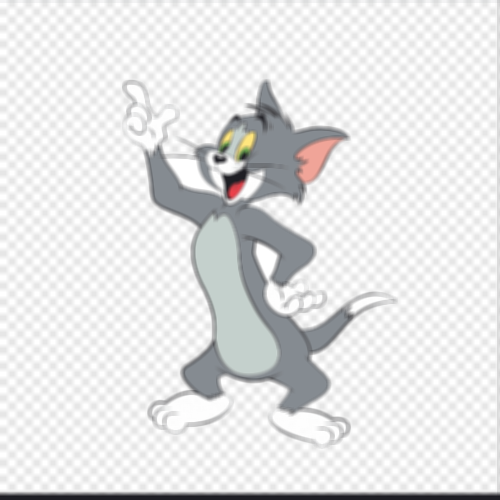

In [30]:
#mean filter
mean_kernel =np.ones((5,5),np.float32)/25
mean_filtered= cv2.filter2D(img_resize,-1,mean_kernel)
cv2_imshow(mean_filtered)

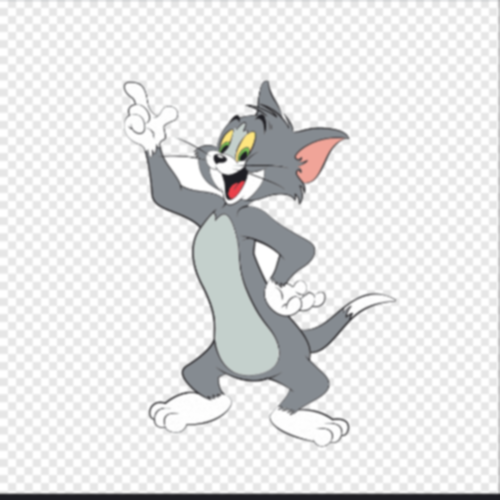

In [31]:
#gaussian filter
gaussian_filtered= cv2.GaussianBlur(img_resize,(5,5),0)
cv2_imshow(gaussian_filtered)

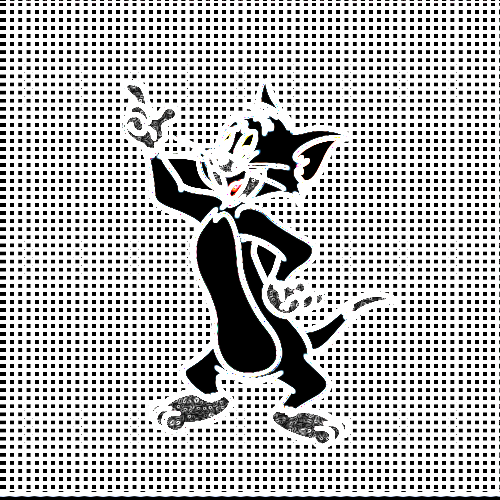

In [32]:
#sobel filter
sobelx = cv2.Sobel(img_resize,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img_resize,cv2.CV_64F,0,1,ksize=5)
sobel_filtered=np.hypot(sobelx,sobely)
cv2_imshow(sobel_filtered)


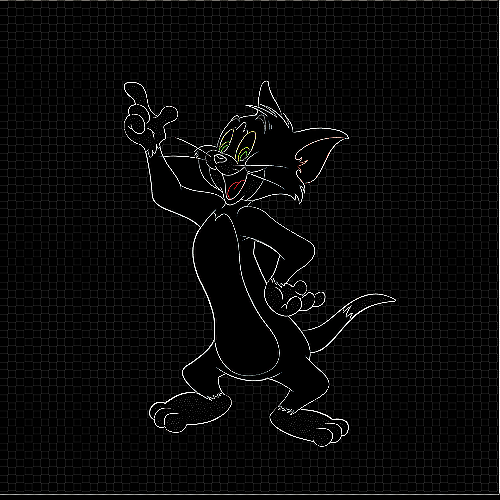

In [33]:
#laplacian filter
laplacian_filtered= cv2.Laplacian(img_resize,cv2.CV_64F)
cv2_imshow(laplacian_filtered)

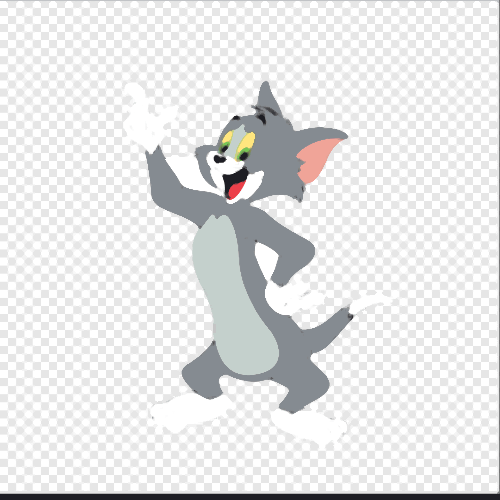

In [34]:
#median filter
median_filtered= cv2.medianBlur(img_resize,5)
cv2_imshow(median_filtered)

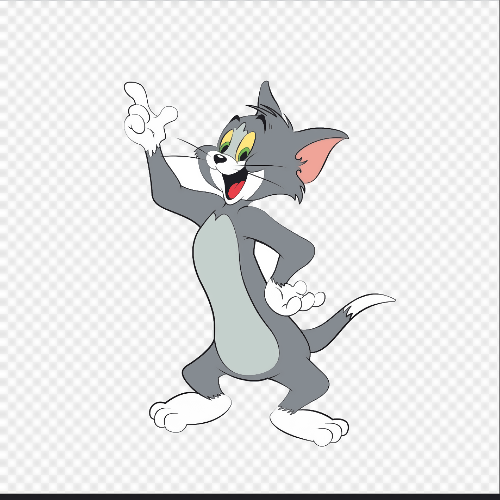

In [35]:
#bilateral filter
bilateral_filtered= cv2.bilateralFilter(img_resize,9,75,75)
cv2_imshow(bilateral_filtered)

SVC without filters

In [36]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [37]:
!unzip '/content/archive (26).zip'

unzip:  cannot find or open /content/archive (26).zip, /content/archive (26).zip.zip or /content/archive (26).zip.ZIP.


In [38]:
#load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [39]:
#normalise the dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [40]:
# Reshape data to flatten the images
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [41]:
#model building svc
model = SVC()

In [42]:
#accuracy of svc
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9792


In [43]:
#classification report
print(classification_report(y_test,model.predict(x_test)))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



SVC with mean and median filter

In [44]:
#load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [45]:
#normalise the dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [46]:
# Reshape data to flatten the images
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [47]:
def apply_filters(images):
  mean_filtered = []
  median_filtered = []

  for img in images:
    img = img.squeeze()

    #Mean Filter
    mean_kernel = np.ones((3,3), np.float32)/9
    mean_filtered_img = cv2.filter2D(img,-1,mean_kernel)
    mean_filtered.append(mean_filtered_img)

    #Median Filter
    median_filtered_img = cv2.medianBlur(img,3)
    median_filtered.append(median_filtered_img)

  return mean_filtered, median_filtered

In [48]:
# Preprocess the training and testing data
train_mean_filtered, train_median_filtered = apply_filters(x_train)
test_mean_filtered, test_median_filtered = apply_filters(x_test)

# Reshape the filtered data
train_mean_filtered = np.array(train_mean_filtered).reshape(np.array(train_mean_filtered).shape[0], -1)
train_median_filtered = np.array(train_median_filtered).reshape(np.array(train_median_filtered).shape[0], -1)
test_mean_filtered = np.array(test_mean_filtered).reshape(np.array(test_mean_filtered).shape[0], -1)
test_median_filtered = np.array(test_median_filtered).reshape(np.array(test_median_filtered).shape[0], -1)

# Train and evaluate the model with mean filtered data
model_mean = SVC(kernel='linear')
model_mean.fit(train_mean_filtered, y_train)
print("SVC with Mean Filtering:")
print(classification_report(y_test, model_mean.predict(test_mean_filtered)))
print('Accuracy:', accuracy_score(y_test, model_mean.predict(test_mean_filtered)))

# Train and evaluate the model with median filtered data
model_median = SVC(kernel='linear')
model_median.fit(train_median_filtered, y_train)
print("SVC with Median Filtering:")
print(classification_report(y_test, model_median.predict(test_median_filtered)))
print('Accuracy:', accuracy_score(y_test, model_median.predict(test_median_filtered)))

SVC with Mean Filtering:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.94      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.93      0.91      0.92       892
           6       0.96      0.96      0.96       958
           7       0.96      0.93      0.94      1028
           8       0.93      0.91      0.92       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Accuracy: 0.9459
SVC with Median Filtering:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.97      0.99      0.98      1135
         